<a href="https://colab.research.google.com/github/DouglasAVS/Teste/blob/main/Over25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports
Nesse ciclo o objetivo é entender o problema , entender os dados e rodar o primeiro modelo.

In [1]:
# Bibliotecas default
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
import numpy as np

#Importação de 9 Classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron

#2.0. Loading Data





In [ ]:
data = pd.read_csv('/content/E0.csv')
#data2 = pd.read_csv('/content/SP1.csv')
#dataUSA = pd.read_csv('/content/USA.csv')

#data = pd.concat([data1,data2])

In [ ]:
data.shape

(380, 106)

In [ ]:
#data = data.dropna (how='all', axis=1)
data.rename(columns={'FTR': 'Res'}, inplace = True)
data.rename(columns={'HomeTeam': 'Home'}, inplace = True)
data.rename(columns={'AwayTeam': 'Away'}, inplace = True)
data.rename(columns={'FTHG': 'HG'}, inplace = True)
data.rename(columns={'FTAG': 'AG'}, inplace = True)
data.rename(columns={'B365H': 'PH'}, inplace = True)
data.rename(columns={'B365A': 'PA'}, inplace = True)
data.rename(columns={'B365D': 'PD'}, inplace = True)

data.rename(columns={'B365>2.5': 'ODD_Over'}, inplace = True)
data.rename(columns={'B365<2.5': 'ODD_Under'}, inplace = True)

#data = data.dropna (how='any', axis=0)

data.tail(10)

,Div,Date,Time,Home,Away,HG,AG,Res,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
370,E0,23/05/2021,16:00,Arsenal,Brighton,2,0,H,0,0,...,2.22,-0.75,1.85,2.05,1.89,2.03,1.92,2.11,1.86,2.03
371,E0,23/05/2021,16:00,Aston Villa,Chelsea,2,1,H,1,0,...,2.33,1.25,1.89,2.01,1.88,2.06,2.00,2.06,1.90,1.99
372,E0,23/05/2021,16:00,Fulham,Newcastle,0,2,A,0,1,...,2.04,-0.25,2.08,1.73,2.17,1.76,2.19,1.84,2.12,1.77
373,E0,23/05/2021,16:00,Leeds,West Brom,3,1,H,2,0,...,2.60,-1.00,1.88,2.02,1.90,2.01,1.94,2.14,1.87,2.00
374,E0,23/05/2021,16:00,Leicester,Tottenham,2,4,A,1,1,...,2.47,-0.75,2.02,1.88,1.98,1.94,2.07,1.94,2.01,1.87
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,3.49,-2.25,1.86,2.04,1.88,2.03,1.98,2.14,1.88,2.00
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,2.77,-1.75,2.01,1.89,1.99,1.89,2.20,2.00,2.03,1.85
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,2.05,0.00,2.04,1.86,2.05,1.86,2.17,1.90,2.03,1.84
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,2.14,-0.75,2.00,1.90,2.02,1.91,2.06,2.01,1.99,1.89
379,E0,23/05/2021,16:00,Wolves,Man United,1,2,A,1,2,...,1.62,-0.25,2.04,1.86,2.10,1.84,2.10,1.94,2.00,1.88


In [ ]:

#data = data.append({'Home':'Ried','Away':'Altach'}, ignore_index =True)
#data = data.append({'Home':'Tirol','Away':'Admira'}, ignore_index =True)
#data = data.append({'Home':'Cagliari','Away':'Milan'}, ignore_index =True)


#data = data.append({'Home':'Sligo Rovers','Away':'Finn Harps'}, ignore_index =True)
#data = data.append({'Home':'St. Patricks','Away':'UC Dublin'},  ignore_index =True)
#data = data.append({'Home':'Sociedad','Away':'Alaves'},   ignore_index =True)
#data = data.append({'Home':'Barcelona','Away':'Osasuna'}, ignore_index =True)

data.fillna(0, inplace=True)

data.tail()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
3795,Brazil,Serie A,2021,10/12/2021,00:30,Gremio,Atletico-MG,4.0,3.0,H,1.54,4.57,5.91,1.58,4.60,6.21,1.52,4.33,5.77
3796,Brazil,Serie A,2021,10/12/2021,00:30,Juventude,Corinthians,1.0,0.0,H,2.33,3.11,3.55,2.37,3.20,3.70,2.25,3.06,3.46
3797,Brazil,Serie A,2021,10/12/2021,00:30,Palmeiras,Ceara,1.0,0.0,H,4.21,3.84,1.86,4.23,3.95,1.95,4.00,3.73,1.85
3798,Brazil,Serie A,2021,10/12/2021,00:30,Santos,Cuiaba,1.0,1.0,D,2.11,3.04,4.33,2.14,3.24,4.45,2.07,3.01,4.09
3799,Brazil,Serie A,2021,10/12/2021,00:30,Sport Recife,Athletico-PR,1.0,1.0,D,1.75,3.64,5.28,1.75,3.76,5.60,1.71,3.57,5.19


#3.0. Data Preparation

Essa seção tem o objetivo de preparar os dados.

In [ ]:
# Excluir colunas 

data=data.drop(['League','Time','MaxH','MaxD','MaxA','AvgH','AvgD','AvgA','Country','Date'],1)

#data=data.drop(['Div','Time','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','BWH','BWD','BWA','IWH','IWD','IWA','PSH','PSD','PSA','WHH','WHD','WHA','VCH','B365CD','B365CA','BWCH','BWCD','BWCA','IWCH','IWCD','IWCA','PSCH','PSCD','PSCA','WHCH','WHCD','WHCA','VCCH','VCCD','VCCA','MaxCH','MaxCD','MaxCA','AvgCH','AvgCD','AvgCA','B365C>2.5','B365C<2.5','PC>2.5','PC<2.5','MaxC>2.5','MaxC<2.5','AvgC>2.5','AvgC<2.5','AHCh','B365CAHH','B365CAHA','PCAHH','PCAHA','MaxCAHH','MaxCAHA','AvgCAHH','AvgCAHA'],1)

#data=data.drop(['VCD','VCA','MaxH','MaxD','MaxA','AvgH','AvgD','AvgA','P>2.5','P<2.5','Max>2.5','Max<2.5','Avg>2.5','Avg<2.5','AHh','B365AHH','B365AHA','PAHH','PAHA','MaxAHH','MaxAHA','AvgAHH','AvgAHA','B365CH'],1)

#data=data.drop(['Referee'],1)



data["Res"] = data["Res"].map({"H":0,"A":1,"D":2})

data=data.drop(['Res'],1)

data.head()

In [ ]:
# Excluir colunas 


data=data.drop(['Div','Time','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','BWH','BWD','BWA','IWH','IWD','IWA','PSH','PSD','PSA','WHH','WHD','WHA','VCH','B365CD','B365CA','BWCH','BWCD','BWCA','IWCH','IWCD','IWCA','PSCH','PSCD','PSCA','WHCH','WHCD','WHCA','VCCH','VCCD','VCCA','MaxCH','MaxCD','MaxCA','AvgCH','AvgCD','AvgCA','B365C>2.5','B365C<2.5','PC>2.5','PC<2.5','MaxC>2.5','MaxC<2.5','AvgC>2.5','AvgC<2.5','AHCh','B365CAHH','B365CAHA','PCAHH','PCAHA','MaxCAHH','MaxCAHA','AvgCAHH','AvgCAHA'],1)

data=data.drop(['VCD','VCA','MaxH','MaxD','MaxA','AvgH','AvgD','AvgA','P>2.5','P<2.5','Max>2.5','Max<2.5','Avg>2.5','Avg<2.5','AHh','B365AHH','B365AHA','PAHH','PAHA','MaxAHH','MaxAHA','AvgAHH','AvgAHA','B365CH'],1)

data=data.drop(['Referee'],1)



data["Res"] = data["Res"].map({"H":0,"A":1,"D":2})

data=data.drop(['Res'],1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Date,Home,Away,HG,AG,PH,PD,PA,ODD_Over,ODD_Under
0,12/09/2020,Fulham,Arsenal,0,3,6.00,4.33,1.53,1.72,2.10
1,12/09/2020,Crystal Palace,Southampton,1,0,3.10,3.25,2.37,2.20,1.66
2,12/09/2020,Liverpool,Leeds,4,3,1.28,6.00,9.50,1.53,2.50
3,12/09/2020,West Ham,Newcastle,0,2,2.15,3.40,3.40,1.90,1.90
4,13/09/2020,West Brom,Leicester,0,3,3.80,3.60,1.95,1.90,1.90


In [ ]:
#Criando a Variavel Alvo

data['Gols_T'] = data['HG'] + data['AG']

conditionlist = [
    (data['Gols_T'] > 2),
     (data['Gols_T'] <=2)]
choicelist = ['Over','Under']
data['Over25'] = np.select(conditionlist, choicelist, default='Under')

data["Over25"] = data["Over25"].map({"Over":1,"Under":0})

data=data.drop(['Gols_T'],1)


data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,Date,Home,Away,HG,AG,PH,PD,PA,ODD_Over,ODD_Under,Over25
375,23/05/2021,Liverpool,Crystal Palace,2,0,1.14,8.5,15.0,1.36,3.2,0
376,23/05/2021,Man City,Everton,5,0,1.44,5.0,6.5,1.61,2.3,1
377,23/05/2021,Sheffield United,Burnley,1,0,2.80,3.6,2.4,1.72,2.1,0
378,23/05/2021,West Ham,Southampton,3,0,1.65,4.0,5.0,1.61,2.3,1
379,23/05/2021,Wolves,Man United,1,2,2.50,3.5,2.7,1.72,2.1,1


In [ ]:
data1 = data.loc[(data['Home'] == 'Liverpool')]
data1.head(30)


#data2 = data1.loc[(data['Res'] == 0)]
#data2.shape


,Date,Home,Away,PH,PD,PA,ODD_Over,ODD_Under,Over25,Med_T,Total_CV
2,12/09/2020,Liverpool,Leeds,1.28,6.00,9.50,1.53,2.50,1,NaN,NaN
27,28/09/2020,Liverpool,Arsenal,1.45,4.75,6.50,1.53,2.50,1,NaN,NaN
52,24/10/2020,Liverpool,Sheffield United,1.22,6.50,12.00,1.50,2.62,1,NaN,NaN
61,31/10/2020,Liverpool,West Ham,1.36,5.25,7.50,1.40,3.00,1,NaN,NaN
85,22/11/2020,Liverpool,Leicester,1.85,4.00,3.80,1.57,2.37,1,2.700000,0.55
105,06/12/2020,Liverpool,Wolves,1.50,4.33,6.50,1.72,2.10,1,1.916667,0.74
123,16/12/2020,Liverpool,Tottenham,1.75,3.80,4.50,1.66,2.20,1,2.500000,0.70
145,27/12/2020,Liverpool,West Brom,1.11,10.00,19.00,1.36,3.20,0,1.687500,0.67
176,17/01/2021,Liverpool,Man United,1.95,3.80,3.60,1.66,2.20,0,2.388889,0.54
183,21/01/2021,Liverpool,Burnley,1.18,7.50,15.00,1.53,2.50,0,1.300000,1.05


In [ ]:
# Criando Colunas 

data['Med_G_C'] = data.groupby('Home')['HG'].transform(lambda x: x.rolling(10, 5).mean())

data['Med_G_F'] = data.groupby('Away')['AG'].transform(lambda x: x.rolling(10, 5).mean())

data['DP_G_C'] = data.groupby('Home')['HG'].transform(lambda x: x.rolling(10, 5).std())

data['DP_G_F'] = data.groupby('Away')['AG'].transform(lambda x: x.rolling(10, 5).std())






#data['Med_J_O_C'] = data.groupby('Home')['Over25'].transform(lambda x: x.rolling(10, 5).mean())

#data['Med_J_O_F'] = data.groupby('Away')['Over25'].transform(lambda x: x.rolling(10, 5).mean())

#data['Med_J_O_C'] = data.groupby('Home')['Med_J_O_C'].shift(1, axis = 0)
#data['Med_J_O_F'] = data.groupby('Away')['Med_J_O_F'].shift(1, axis = 0)
#data['Med_G_C'] = data.groupby('Home')['Med_G_C'].shift(1, axis = 0)
#data['Med_G_F'] = data.groupby('Away')['Med_G_F'].shift(1, axis = 0)
#data['DP_G_C'] = data.groupby('Home')['DP_G_C'].shift(1, axis = 0)
#data['DP_G_F'] = data.groupby('Away')['DP_G_F'].shift(1, axis = 0)


data['Casa_CV'] = (data['DP_G_C'] ) / (data['Med_G_C'])  
data['Fora_CV'] =(data['DP_G_F']) / (data['Med_G_F'] )

data['Med_T'] = (data['Med_G_C'] + data['Med_G_F']) / 2
data['Total_CV'] = (data['Casa_CV'] + data['Fora_CV']) /2 


data=data.drop(['HG','AG','DP_G_C','DP_G_F','Med_G_C','Med_G_F','Casa_CV','Fora_CV'],1)

data.Total_CV=data.Total_CV.round(2)

#data.Casa_CV=data.Casa_CV.round(2)
#data.Fora_CV=data.Fora_CV.round(2)
data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,Date,Home,Away,PH,PD,PA,ODD_Over,ODD_Under,Over25,Med_T,Total_CV
375,23/05/2021,Liverpool,Crystal Palace,1.14,8.5,15.0,1.36,3.2,0,0.9,0.98
376,23/05/2021,Man City,Everton,1.44,5.0,6.5,1.61,2.3,1,1.7,0.90
377,23/05/2021,Sheffield United,Burnley,2.80,3.6,2.4,1.72,2.1,0,1.1,0.93
378,23/05/2021,West Ham,Southampton,1.65,4.0,5.0,1.61,2.3,1,1.3,0.99
379,23/05/2021,Wolves,Man United,2.50,3.5,2.7,1.72,2.1,1,1.2,0.88


In [ ]:
#data['Date'].astype('datetime64')
#pd.to_datetime('01/02/2021',format='%d/%m/%Y')

#data.sort_values('Date', ascending = True)

#data.rename(columns={'Season': 'Temporada'}, inplace = True)

#data.Total_CV =data.Total_CV.round(2)
#data.Med_T  =data.Med_T.round(2)
#data.Med_G_C=data.Med_G_C	.round(2)
#data.Med_G_F=data.Med_G_F.round(2)
#data.DP_G_C = data.DP_G_C.round(2)
#data.DP_G_F = data.DP_G_F.round(2)

#data.Casa_CV = data.Casa_CV.round(2)
#data.Fora_CV = data.Fora_CV.round(2)



data.head()

,Home,Away,HG,AG,PH,PD,PA,Gols_T,Over25,Med_G_C,...,Med_GS_F,DP_GS_C,DP_GS_F,CasaGS_CV,ForaGS_CV,Med_T,Total_CV,Total_CV_GS,Med_J_O_C,Med_J_O_F
0,Palmeiras,Portuguesa,1.0,1.0,1.75,3.86,5.25,2.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sport Recife,Flamengo RJ,1.0,1.0,2.83,3.39,2.68,2.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Figueirense,Nautico,2.0,1.0,1.60,4.04,6.72,3.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Botafogo RJ,Sao Paulo,4.0,2.0,2.49,3.35,3.15,6.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Corinthians,Fluminense,0.0,1.0,1.96,3.53,4.41,1.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#data['Med_J_O_G'] = (data['Med_J_O_C'] + data['Med_J_O_F']) /2

#data=data.drop(['Med_J_O_C','Med_J_O_F'],1)


#data=data.drop(['Med_G_C','Med_G_F','X_P','X_G','Med_J_O_G','Med_T','Over25'],1)

data.dropna(inplace = True)


conditionlist = [
    (data['Med_T'] > 1.25) & (data ['Total_CV'] <= 0.60),
    (data['Med_T'] <= 1.00 ) & (data ['Total_CV'] >= 1.00)]
choicelist = ['Over','Under']
data['Teste'] = np.select(conditionlist, choicelist, default='Under')

data["Teste"] = data["Teste"].map({"Over":1,"Under":0})

data.tail(5)


,Date,Home,Away,PH,PD,PA,ODD_Over,ODD_Under,Over25,Med_T,Total_CV,Teste
375,23/05/2021,Liverpool,Crystal Palace,1.14,8.5,15.0,1.36,3.2,0,0.9,0.98,0
376,23/05/2021,Man City,Everton,1.44,5.0,6.5,1.61,2.3,1,1.7,0.90,0
377,23/05/2021,Sheffield United,Burnley,2.80,3.6,2.4,1.72,2.1,0,1.1,0.93,0
378,23/05/2021,West Ham,Southampton,1.65,4.0,5.0,1.61,2.3,1,1.3,0.99,0
379,23/05/2021,Wolves,Man United,2.50,3.5,2.7,1.72,2.1,1,1.2,0.88,0


In [ ]:
data.dropna(inplace = True)

In [ ]:
data1 = data.loc[(data['Teste'] == 1) ] # 
data1.shape

(7, 12)

In [ ]:
data2 = data1.loc[(data1['Over25'] == 1)]
data2.shape

(5, 12)

In [ ]:
mean_df = data2['ODD_Over'].mean()
print('Odd media {:.2f}'.format(mean_df))




Odd media 1.82


In [ ]:
data.shape

(298, 12)

In [ ]:
data100 = data.loc[(data['Teste'] == data['Over25'])] # 
data100.shape

(157, 12)

In [ ]:
data1.tail(10)

,Date,Home,Away,PH,PD,PA,ODD_Over,ODD_Under,Over25,Med_T,Total_CV,Teste
85,22/11/2020,Liverpool,Leicester,1.85,4.0,3.80,1.57,2.37,1,2.700000,0.55,1
89,28/11/2020,Brighton,Liverpool,5.50,4.2,1.57,1.57,2.37,0,1.300000,0.52,1
100,05/12/2020,West Ham,Man United,3.60,3.6,2.00,1.72,2.10,1,2.350000,0.53,1
166,12/01/2021,Wolves,Everton,2.45,3.1,3.10,2.37,1.57,1,1.277778,0.58,1
176,17/01/2021,Liverpool,Man United,1.95,3.8,3.60,1.66,2.20,0,2.388889,0.54,1
305,11/04/2021,West Ham,Leicester,3.00,3.3,2.37,1.90,1.90,1,1.750000,0.44,1
352,14/05/2021,Newcastle,Man City,11.00,6.0,1.25,1.53,2.50,1,2.200000,0.56,1


In [ ]:
matches = data.shape[0]

features = data.shape[1] -1 #Retirando a coluna Resultado

Jogos_Over = len(data[data.Over25==1])
Jogos_Under = len(data[data.Over25==0])

val=[Jogos_Over,Jogos_Under]

win_rate = (float(Jogos_Over)/(matches)) *100

print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos com mais de 2 gols: ', Jogos_Over)
print ('Total de jogos com menos de 2 gols: ', Jogos_Under)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))

Total de jogos:  298
Total de colunas:  11
Total de jogos com mais de 2 gols:  144
Total de jogos com menos de 2 gols:  154
Percentual de jogos ganhos em casa: 48.32%


In [ ]:
dataCasa = data.loc[(data['PH'] <= 170)]
dataCasa = dataCasa.loc[(dataCasa['Med_T'] >= 1.25)]


dataCasa = dataCasa.loc[(dataCasa['Total_CV'] <=0.60)]

matches = dataCasa.shape[0]

features = dataCasa.shape[1] -1 #Retirando a coluna Resultado

Jogos_Over = len(dataCasa[dataCasa.Over25==1])
Jogos_Under = len(dataCasa[dataCasa.Over25==0])

val=[Jogos_Over,Jogos_Under]

win_rate = (float(Jogos_Over)/(matches)) *100

print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos com mais de 2 gols: ', Jogos_Over)
print ('Total de jogos com 2 gols ou menos: ', Jogos_Under)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))

Total de jogos:  7
Total de colunas:  11
Total de jogos com mais de 2 gols:  5
Total de jogos com 2 gols ou menos:  2
Percentual de jogos ganhos em casa: 71.43%


In [ ]:
dataacertos = dataCasa.loc[(dataCasa['Over25'] == 1)]
dataacertos.shape

(5, 12)

In [ ]:
mean_df = dataacertos['ODD_Over'].mean()
print(mean_df)

1.818


In [ ]:
dataunder = data.loc[(data['PH'] <= 100)]
dataunder = dataunder.loc[(dataunder['Med_T'] <= 1)]


dataunder = dataunder.loc[(dataunder['Total_CV'] > 1)]

matches = dataunder.shape[0]

features = dataunder.shape[1] -1 #Retirando a coluna Resultado

Jogos_Over = len(dataunder[dataunder.Over25==1])
Jogos_Under = len(dataunder[dataunder.Over25==0])

val=[Jogos_Over,Jogos_Under]

win_rate = (float(Jogos_Under)/(matches)) *100

print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos com mais de 2 gols: ', Jogos_Over)
print ('Total de jogos com 2 gols ou menos: ', Jogos_Under)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))

Total de jogos:  52
Total de colunas:  11
Total de jogos com mais de 2 gols:  15
Total de jogos com 2 gols ou menos:  37
Percentual de jogos ganhos em casa: 71.15%


In [ ]:
dataacertosunder = dataunder.loc[(dataunder['Over25'] == 0)]
dataacertosunder.shape

(31, 12)

In [ ]:
mean_df = dataacertosunder['ODD_Under'].mean()
print(mean_df)

1.9612903225806446


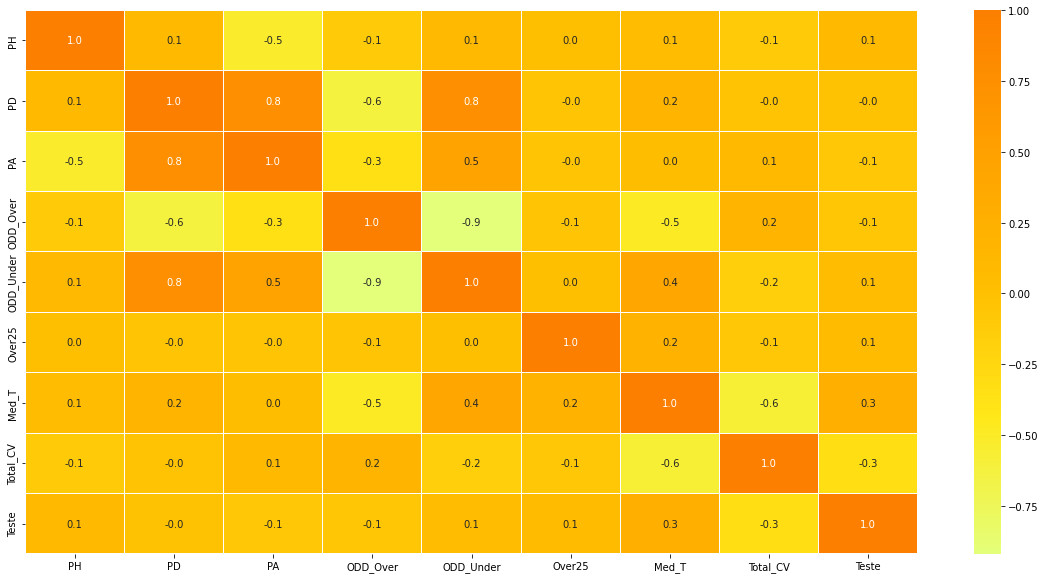

In [ ]:
f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), cmap ='Wistia', annot=True, linewidths=.09, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
# Take the fields of interest and plug them into variable X
X = data[['Teste','Med_T']]
# Make sure to provide the corresponding truth value
Y = data['Over25'].values.tolist()
  
# Split the data into test and training (30% for test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state =17)

In [ ]:
features = data.drop(['Home','Away','PH','PD','PA','Total_CV','Date','ODD_Over','ODD_Under','Over25'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)
 
print ('Features: ',features_scale.shape)
print (features_scale)

Features:  (298, 2)
[[0.53488372 0.        ]
 [0.72093023 0.        ]
 [0.39534884 0.        ]
 [0.02325581 0.        ]
 [0.30232558 0.        ]
 [0.20930233 0.        ]
 [0.25581395 0.        ]
 [1.         1.        ]
 [0.44186047 0.        ]
 [0.34883721 0.        ]
 [0.34883721 1.        ]
 [0.72093023 0.        ]
 [0.06976744 0.        ]
 [0.86046512 0.        ]
 [0.20930233 0.        ]
 [0.30232558 0.        ]
 [0.14728682 0.        ]
 [0.48837209 0.        ]
 [0.8372093  1.        ]
 [0.6744186  0.        ]
 [0.3255814  0.        ]
 [0.40310078 0.        ]
 [0.3255814  0.        ]
 [0.63565891 0.        ]
 [0.40310078 0.        ]
 [0.44186047 0.        ]
 [0.39534884 0.        ]
 [0.20930233 0.        ]
 [0.09302326 0.        ]
 [0.6744186  0.        ]
 [0.36434109 0.        ]
 [0.59689922 0.        ]
 [0.3255814  0.        ]
 [0.09302326 0.        ]
 [0.44186047 0.        ]
 [0.40863787 0.        ]
 [0.37541528 0.        ]
 [0.34219269 0.        ]
 [0.45293466 0.        ]
 [0.3

In [ ]:
#67,39% clf = SVC()
#68,60% clf = LogisticRegression()
#71,83% clf = DecisionTreeClassifier()
#72,32% clf = KNeighborsClassifier()
# Ate agora o melhor #72,53% clf = MLPClassifier()
#73,76% clf = RandomForestClassifier()
#75,19% clf = GradientBoostingClassifier()
#74,55% clf = XGBClassifier()
#75,40% clf = LGBMClassifier()
#clf =Perceptron()

In [ ]:
clf =LogisticRegression()
clf


LogisticRegression()

In [ ]:
# Train the classifier using the train data
clf = clf.fit(X_train,Y_train)

In [ ]:
# Validate the classifier
accuracy = clf.score(X_test, Y_test)
print('Accuracy: ' + str(accuracy))
# Make a confusion matrix
prediction = clf.predict(X_test)
 
cm = confusion_matrix(prediction, Y_test)
cr = classification_report(prediction, Y_test)
print(cm)
print(cr)

Accuracy: 0.5583333333333333
[[42 37]
 [16 25]]
              precision    recall  f1-score   support

           0       0.72      0.53      0.61        79
           1       0.40      0.61      0.49        41

    accuracy                           0.56       120
   macro avg       0.56      0.57      0.55       120
weighted avg       0.61      0.56      0.57       120



In [ ]:
data.shape

(298, 12)

In [ ]:
previsao=features_scale[100:]
  
Casa_full=data['Home']
Casa=Casa_full[100:]
 
Visitante_full=data['Away']
Visitante=Visitante_full[100:]
 
res_full=data["Over25"]
res=res_full[100:]

var_full=data["Total_CV"]
var=var_full[100:]

pred=clf.predict(previsao)
 
df=pd.DataFrame({'Mandante':Casa,'Visitante':Visitante,'Prognóstico':pred,'Resultado':res,'Variancia':var})
 
df.head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Mandante,Visitante,Prognóstico,Resultado,Variancia
182,Fulham,Man United,0,1,0.83
183,Liverpool,Burnley,0,0,1.05
184,Aston Villa,Newcastle,0,0,1.11
185,Crystal Palace,West Ham,0,1,0.84
186,Newcastle,Leeds,0,1,0.83
187,Southampton,Arsenal,0,1,0.83
188,West Brom,Man City,0,1,1.47
189,Burnley,Aston Villa,0,1,0.93
190,Chelsea,Wolves,0,0,1.05
191,Brighton,Fulham,0,0,1.06


print(df.groupby(by=['Fruit','Date']).sum().groupby(level=[0]).cumsum())